### Imports

In [104]:
# libraries
import numpy as np
import pandas as pd
import matplotlib as mpl

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
from scipy.stats import pearsonr, pointbiserialr

# training and normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

### Load Data

In [107]:
df = pd.read_csv(r"mldataset.csv")

print(df.shape)
df.head()

(2772, 13)


,subject_id,urine_output_mean,creatinine_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,sbp_mean,lactate_mean,age,label,creatinine_change
0,10033740,3465.454545,1.175000,1.1,1.1,1.000000,Improving,70.854237,108.023729,2.166667,76,Improving_Recovered,0.0
1,14378086,106.666667,2.497222,1.5,1.6,0.937500,Improving,74.378049,107.659091,6.775000,68,Improving_Recovered,-0.1
2,10653347,820.777778,1.786667,1.1,3.1,0.354839,Worsening,73.918367,110.857143,1.926087,52,Worsening,-2.0
3,18687772,1063.467290,2.391244,0.8,2.9,0.275862,Worsening,75.543478,119.424242,2.071429,59,Worsening,-2.1
4,13191989,1367.041667,1.082884,0.5,1.4,0.357143,Worsening,83.741636,111.830882,9.942857,23,Worsening,-0.9


### Create Binary Label

In [110]:
# 1 = Improving/Recovered, 0 = Worsening
df['label_binary'] = df['label'].map({'Improving_Recovered': 1, 'Worsening': 0})

print(df['label_binary'].value_counts())

label_binary
1    1386
0    1386
Name: count, dtype: int64


### Define Groups and Variables

In [153]:
# continuous variables for statistical tests
continuous_vars = [
    'creatinine_mean', 'creatinine_change', 'first_creat', 'last_creat',
    'urine_output_mean', 'recovery_ratio', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]

# comparison groups
group_improving = df[df['label_binary'] == 1]
group_worsening = df[df['label_binary'] == 0]

print(f"Improving group: {len(group_improving)}")
print(f"Worsening group: {len(group_worsening)}")

Improving group: 1386
Worsening group: 1386


### Independent t-test

In [116]:
print("Independent t-test Results:\n")
for col in continuous_vars:
    t_stat, p_val = stats.ttest_ind(
        group_improving[col],
        group_worsening[col],
        equal_var=False  # Welch's t-test
    )
    print(f"{col}: t = {t_stat:.4f}, p = {p_val:.4e}")

Independent t-test Results:

creatinine_mean: t = -7.4678, p = 1.0918e-13
creatinine_change: t = 39.0268, p = 2.1949e-265
first_creat: t = 10.9286, p = 5.0493e-27
last_creat: t = -24.3829, p = 4.3231e-118
urine_output_mean: t = 6.7868, p = 1.4114e-11
recovery_ratio: t = 28.9178, p = 7.5502e-146
map_mean: t = 2.3878, p = 1.7024e-02
sbp_mean: t = 5.0477, p = 4.7626e-07
lactate_mean: t = -1.0949, p = 2.7376e-01
age: t = -2.9220, p = 3.5062e-03


### Mann-Whitney U Test

In [119]:
print("Mann-Whitney U Test Results:\n")
for col in continuous_vars:
    u_stat, p_val = stats.mannwhitneyu(
        group_improving[col],
        group_worsening[col],
        alternative='two-sided'
    )
    print(f"{col}: U = {u_stat:.4f}, p = {p_val:.4e}")

Mann-Whitney U Test Results:

creatinine_mean: U = 720596.5000, p = 4.8885e-30
creatinine_change: U = 1914853.5000, p = 0.0000e+00
first_creat: U = 1104282.5000, p = 8.4029e-12
last_creat: U = 381203.0000, p = 1.3419e-166
urine_output_mean: U = 1147615.0000, p = 6.6228e-19
recovery_ratio: U = 1920996.0000, p = 0.0000e+00
map_mean: U = 1100072.0000, p = 3.4834e-11
sbp_mean: U = 1062613.0000, p = 1.2558e-06
lactate_mean: U = 826501.0000, p = 2.0197e-10
age: U = 901192.0000, p = 4.8712e-03


### Point-Biserial Correlation

In [122]:
print("Point-Biserial Correlation Results:\n")
for col in continuous_vars:
    r, p = pointbiserialr(df['label_binary'], df[col])
    print(f"{col}: r = {r:.4f}, p = {p:.4e}")

Point-Biserial Correlation Results:

creatinine_mean: r = -0.1405, p = 1.0862e-13
creatinine_change: r = 0.5956, p = 7.1270e-266
first_creat: r = 0.2033, p = 3.0053e-27
last_creat: r = -0.4204, p = 3.9901e-119
urine_output_mean: r = 0.1279, p = 1.3967e-11
recovery_ratio: r = 0.4815, p = 6.4790e-161
map_mean: r = 0.0453, p = 1.7015e-02
sbp_mean: r = 0.0955, p = 4.7619e-07
lactate_mean: r = -0.0208, p = 2.7366e-01
age: r = -0.0554, p = 3.5062e-03


### Pearson Correlation Analysis

In [125]:
# List of numeric features
feature_cols = [
    'creatinine_mean', 'creatinine_change', 'first_creat', 'last_creat',
    'urine_output_mean', 'recovery_ratio', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]

target = 'label_binary'

print("Pearson Correlation with Label (Improving vs Worsening):\n")
results = []

for col in feature_cols:
    r, p = pearsonr(df[col], df[target])
    results.append([col, r, p])
    print(f"{col}: r = {r:.4f}, p = {p:.4e}")

# dataframe of results
corr_df = pd.DataFrame(results, columns=['Feature', 'Pearson_r', 'p_value'])

Pearson Correlation with Label (Improving vs Worsening):

creatinine_mean: r = -0.1405, p = 1.0862e-13
creatinine_change: r = 0.5956, p = 7.1270e-266
first_creat: r = 0.2033, p = 3.0053e-27
last_creat: r = -0.4204, p = 3.9901e-119
urine_output_mean: r = 0.1279, p = 1.3967e-11
recovery_ratio: r = 0.4815, p = 6.4790e-161
map_mean: r = 0.0453, p = 1.7015e-02
sbp_mean: r = 0.0955, p = 4.7619e-07
lactate_mean: r = -0.0208, p = 2.7366e-01
age: r = -0.0554, p = 3.5062e-03


### Pearson Correlation Bar Plot

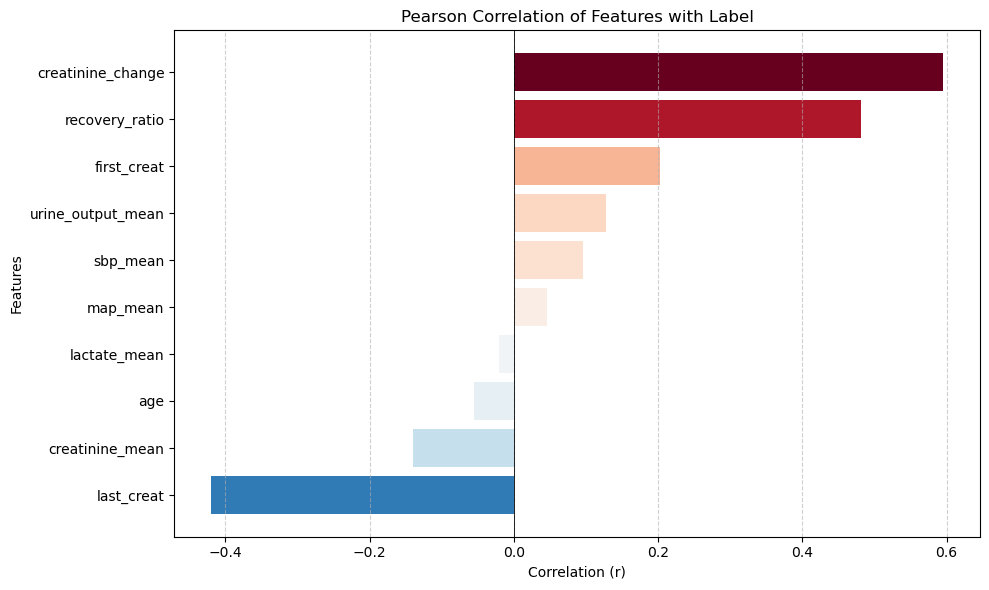

In [128]:
# compute correlations
corrs = []
for col in feature_cols:
    r, p = pearsonr(df[col], df['label_binary'])
    corrs.append([col, r])

# Convert to dataframe and sort
corr_plot_df = pd.DataFrame(corrs, columns=['Feature', 'Pearson_r'])
corr_plot_df = corr_plot_df.sort_values(by='Pearson_r', ascending=True)

# colors
vals = corr_plot_df['Pearson_r'].values
max_abs = np.nanmax(np.abs(vals))
norm = mpl.colors.Normalize(vmin=-max_abs, vmax=max_abs)
cmap = plt.cm.RdBu_r
colors = cmap(norm(vals))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(corr_plot_df['Feature'], corr_plot_df['Pearson_r'], color=colors)
plt.title("Pearson Correlation of Features with Label")
plt.xlabel("Correlation (r)")
plt.ylabel("Features")
plt.axvline(0, color="black", linewidth=0.6)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Feature Correlations (Excluding Outcome-Derived Variables)

Numeric columns used for correlation:
['subject_id', 'urine_output_mean', 'creatinine_mean', 'first_creat', 'map_mean', 'sbp_mean', 'lactate_mean', 'age', 'label_num']

Pearson correlation of numeric features the renal recovery outcome (Improving=1):
first_creat          0.203309
urine_output_mean    0.127892
sbp_mean             0.095469
map_mean             0.045323
subject_id           0.020143
lactate_mean        -0.020799
age                 -0.055433
creatinine_mean     -0.140484
Name: label_num, dtype: float64


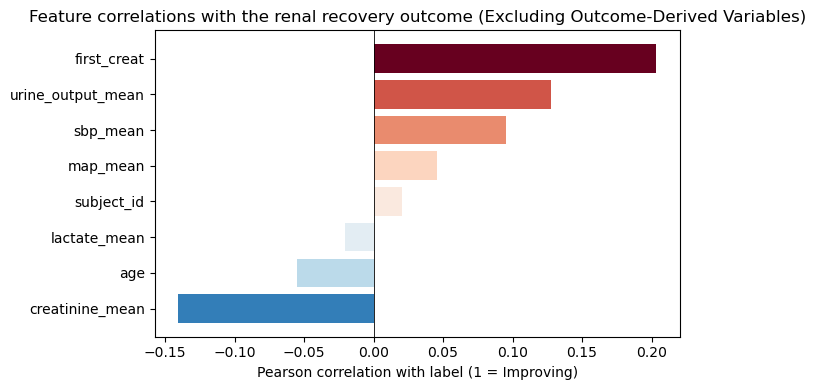

In [131]:
# encode label to numeric for correlation
label_map = {"Improving_Recovered": 1, "Worsening": 0}
df["label_num"] = df["label"].map(label_map)

# removed outcome-derived variables to avoid data leakage
exclude_cols = [
    "creatinine_change",
    "recovery_ratio",
    "last_creatinine",
    "last_creat",
    "label_binary"
]

# drop excluded columns
numeric = (
    df
    .select_dtypes(include=[np.number])
    .drop(columns=[c for c in exclude_cols if c in df.columns])
)

print("Numeric columns used for correlation:")
print(numeric.columns.tolist())

# Compute correlations with the renal recovery outcome
corr_with_label = (
    numeric
    .corr()["label_num"]
    .drop("label_num")
    .sort_values(ascending=False)
)

print("\nPearson correlation of numeric features the renal recovery outcome (Improving=1):")
print(corr_with_label)

# Bar plot with diverging colors
vals = corr_with_label.values
max_abs = np.nanmax(np.abs(vals))
norm = mpl.colors.Normalize(vmin=-max_abs, vmax=max_abs)
cmap = plt.cm.RdBu_r
colors = cmap(norm(vals))

plt.figure(figsize=(7, max(4, 0.4 * len(corr_with_label))))
plt.barh(corr_with_label.index, vals, color=colors)
plt.gca().invert_yaxis()
plt.xlabel("Pearson correlation with label (1 = Improving)")
plt.title("Feature correlations with the renal recovery outcome (Excluding Outcome-Derived Variables)")
plt.axvline(0, color="black", linewidth=0.6)
plt.tight_layout()
plt.show()

### Correlation Heatmap

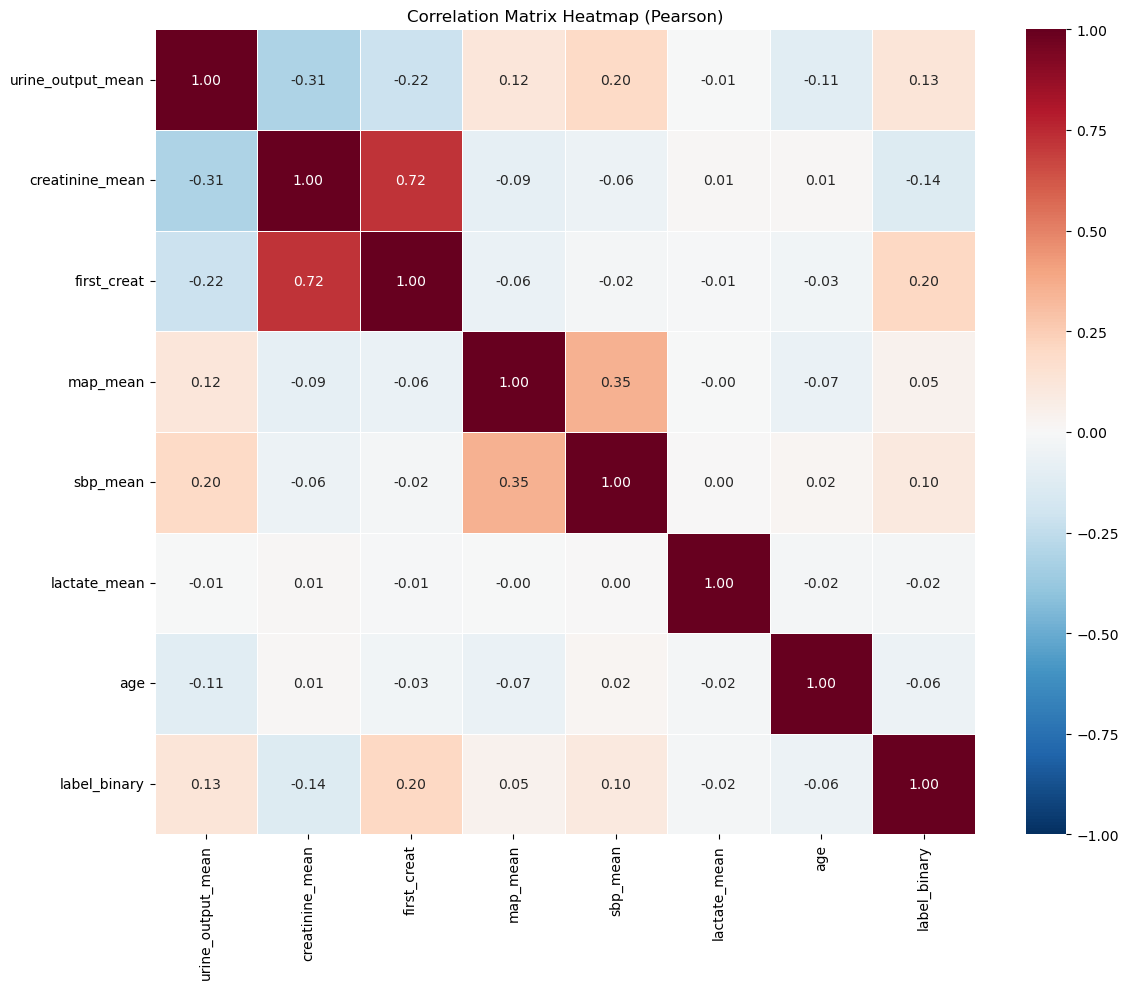

In [134]:
# Heatmap
numeric_cols = [
    'urine_output_mean', 'creatinine_mean', 'first_creat',
    'map_mean', 'sbp_mean', 'lactate_mean', 'age',
    'label_binary'
]
corr_matrix = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap (Pearson)")
plt.tight_layout()
plt.show()

### Scaling

In [136]:
# List of numeric columns to standardize
numeric_cols = [
    'creatinine_mean', 'creatinine_change', 'first_creat', 'last_creat',
    'urine_output_mean', 'recovery_ratio', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled.head()

,subject_id,urine_output_mean,creatinine_mean,first_creat,last_creat,recovery_ratio,recovery_class,map_mean,sbp_mean,lactate_mean,age,label,creatinine_change,label_binary,label_num
0,10033740,1.561830,-0.745636,-0.518097,-0.691493,-0.076663,Improving,-0.221882,-0.098311,-0.034807,0.865448,Improving_Recovered,0.178575,1,1
1,14378086,-0.945703,0.333176,-0.252387,-0.367147,-0.141715,Improving,-0.032532,-0.122140,0.020333,0.315923,Improving_Recovered,0.116145,1,1
2,10653347,-0.412577,-0.246572,-0.518097,0.605890,-0.748164,Worsening,-0.057232,0.086851,-0.037686,-0.783129,Worsening,-1.070030,0,0
3,18687772,-0.231395,0.246708,-0.717380,0.476152,-0.830365,Worsening,0.030092,0.646707,-0.035947,-0.302294,Worsening,-1.132460,0,0
4,13191989,-0.004759,-0.820795,-0.916663,-0.496886,-0.745766,Worsening,0.470616,0.150484,0.058238,-2.775159,Worsening,-0.383297,0,0


### Train/Test Split + Modeling

In [139]:
# Features for modeling
features = [
    'creatinine_mean', 'first_creat', 
    'urine_output_mean', 'map_mean', 'sbp_mean',
    'lactate_mean', 'age'
]

X = df[features]
y = df['label_binary']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Z-score standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Use scaled data for logistic regression and gradient boosting, but not random forest
    X_train_used = X_train_scaled if name != "Random Forest" else X_train
    X_test_used = X_test_scaled if name != "Random Forest" else X_test
    
    model.fit(X_train_used, y_train)
    y_pred = model.predict(X_test_used)
    y_prob = model.predict_proba(X_test_used)[:, 1]
    
    # Metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

# Results table
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.798198   0.789474  0.812274  0.800712  0.870179
Random Forest        0.787387   0.793358  0.776173  0.784672  0.840597
Gradient Boosting    0.801802   0.822394  0.768953  0.794776  0.864309


### ROC Curves

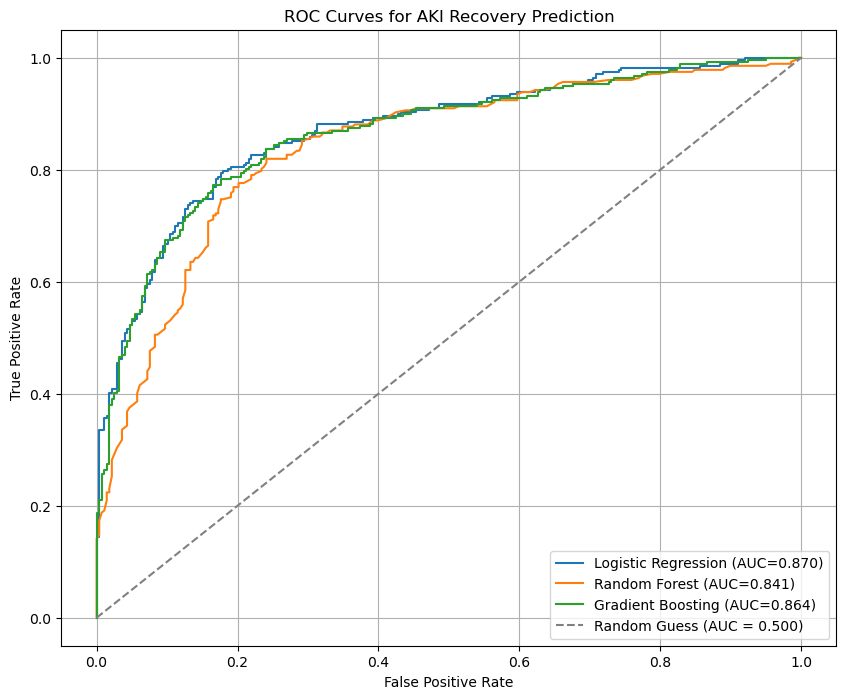

In [142]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    X_test_used = X_test_scaled if name != "Random Forest" else X_test
    y_prob = model.predict_proba(X_test_used)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(
        fpr,
        tpr,
        label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.3f})"
    )

plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    color='gray',
    label="Random Guess (AUC = 0.500)"
)

plt.title("ROC Curves for AKI Recovery Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrices

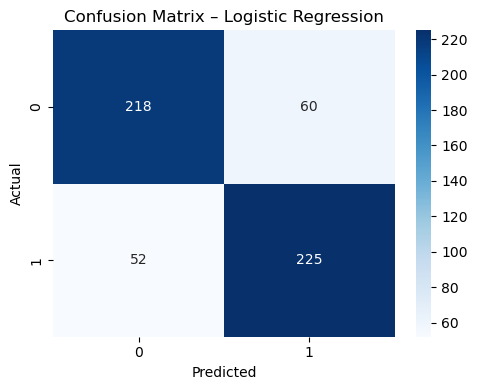

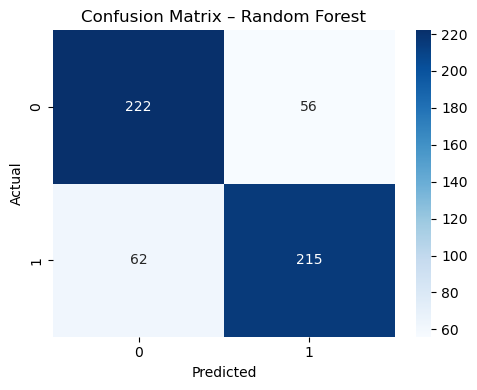

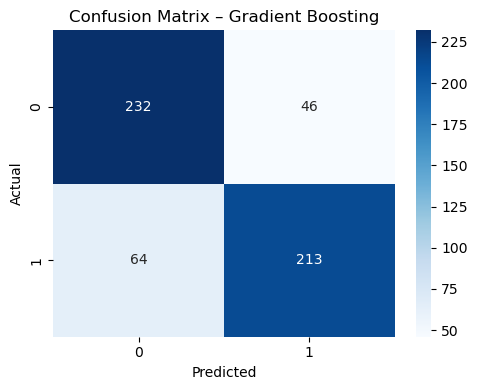

In [144]:
# Confusion matrices for each model
for name, model in models.items():
    
    # Choose scaled or unscaled data correctly
    X_train_used = X_train_scaled if name != "Random Forest" else X_train
    X_test_used = X_test_scaled if name != "Random Forest" else X_test

    # Predictions
    y_train_pred = model.predict(X_train_used)
    y_test_pred = model.predict(X_test_used)

    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

### Classification Report

In [146]:
# Classification report for Logistic Regression
log_reg = models["Logistic Regression"]

# Predict class labels
y_pred_lr = log_reg.predict(X_test_scaled)

# Generate classification report
report = classification_report(
    y_test,
    y_pred_lr,
    target_names=["Worsening (0)", "Improving_Recovered (1)"],
    output_dict=True
)

# Convert to dataframe
report_df = pd.DataFrame(report).T

# Select the rows we want
report_df = report_df.loc[
    ["Worsening (0)", "Improving_Recovered (1)"],
    ["precision", "recall", "f1-score", "support"]
]
print(report_df)

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nOverall Accuracy: {accuracy:.3f}")

                         precision    recall  f1-score  support
Worsening (0)             0.807407  0.784173  0.795620    278.0
Improving_Recovered (1)   0.789474  0.812274  0.800712    277.0

Overall Accuracy: 0.798
